In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import scipy.stats as stats

print(pd.__version__)

%matplotlib inline

0.22.0


In [2]:
train_df = pd.read_table("./train.tsv", index_col = 'train_id', dtype = {'item_condition_id':CategoricalDtype(categories = [str(i) for i in range(1,6)], ordered = True), 'category_name':'category', 'brand_name': 'category', 'shipping':'category'})

/Users/Abe/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
a, b, c, d = train_df['category_name'].str.split("/", 3).str
category_oneLevel = a
category_twoLevel = a + "/" + b
category_threeLevel = a + "/" + b + "/" + c
train_df['category_oneLevel'] = category_oneLevel
train_df['category_twoLevel'] = category_twoLevel
train_df['category_threeLevel'] = category_threeLevel
for col in ['category_oneLevel', 'category_twoLevel', 'category_threeLevel']:
    train_df[col] = train_df[col].astype('category')

In [4]:
for i in train_df.category_oneLevel.cat.categories.values:
    print(i)

Beauty
Electronics
Handmade
Home
Kids
Men
Other
Sports & Outdoors
Vintage & Collectibles
Women


In [5]:
for i in train_df.category_twoLevel.cat.categories.values:
    print(i)

Beauty/Bath & Body
Beauty/Fragrance
Beauty/Hair Care
Beauty/Makeup
Beauty/Other
Beauty/Skin Care
Beauty/Tools & Accessories
Electronics/Cameras & Photography
Electronics/Car Audio, Video & GPS
Electronics/Cell Phones & Accessories
Electronics/Computers & Tablets
Electronics/Media
Electronics/Other
Electronics/TV, Audio & Surveillance
Electronics/Video Games & Consoles
Handmade/Accessories
Handmade/Art
Handmade/Bags and Purses
Handmade/Books and Zines
Handmade/Candles
Handmade/Ceramics and Pottery
Handmade/Children
Handmade/Clothing
Handmade/Crochet
Handmade/Dolls and Miniatures
Handmade/Furniture
Handmade/Geekery
Handmade/Glass
Handmade/Holidays
Handmade/Housewares
Handmade/Jewelry
Handmade/Knitting
Handmade/Music
Handmade/Needlecraft
Handmade/Other
Handmade/Others
Handmade/Paper Goods
Handmade/Patterns
Handmade/Pets
Handmade/Quilts
Handmade/Toys
Handmade/Weddings
Handmade/Woodworking
Home/Artwork
Home/Bath
Home/Bedding
Home/Cleaning Supplies
Home/Furniture
Home/Home Appliances
Home/Ho

In [6]:
train_df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_oneLevel,category_twoLevel,category_threeLevel
train_id,,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Men/Tops,Men/Tops/T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Electronics/Computers & Tablets,Electronics/Computers & Tablets/Components & P...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Women/Tops & Blouses,Women/Tops & Blouses/Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home/Home Décor,Home/Home Décor/Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Women/Jewelry,Women/Jewelry/Necklaces


In [7]:
# Create column for (adult) clothing type that does not distinguish gender - You will just have NaN's for all the items that are not clothing

def get_clothing_type(elem):
    try:
        cat = elem['category_name'].split("/")
        if cat[0] in ['Men', 'Women']: return cat[1]
        else: return np.nan  
    except AttributeError: return np.nan # This error means that the category_name was NaN in the first place

train_df['clothing_type'] = train_df.apply(get_clothing_type, axis = 1).astype('category')


In [8]:
train_df.head(20)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_oneLevel,category_twoLevel,category_threeLevel,clothing_type
train_id,,,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Men/Tops,Men/Tops/T-shirts,Tops
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Electronics/Computers & Tablets,Electronics/Computers & Tablets/Components & P...,NaN
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Women/Tops & Blouses,Women/Tops & Blouses/Blouse,Tops & Blouses
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home/Home Décor,Home/Home Décor/Home Décor Accents,NaN
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Women/Jewelry,Women/Jewelry/Necklaces,Jewelry
5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Women/Other,Women/Other/Other,Other
6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Women/Swimwear,Women/Swimwear/Two-Piece,Swimwear
7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Sports & Outdoors/Apparel,Sports & Outdoors/Apparel/Girls,NaN
8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Sports & Outdoors/Apparel,Sports & Outdoors/Apparel/Girls,NaN


In [10]:
train_df.describe()

,price
count,1.482535e+06
mean,2.673752e+01
std,3.858607e+01
min,0.000000e+00
25%,1.000000e+01
50%,1.700000e+01
75%,2.900000e+01
max,2.009000e+03


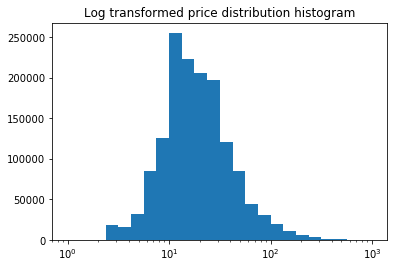

In [52]:
plt.hist(train_df.price[train_df.price > 0], bins=10**np.linspace(0, 3, 25))
plt.title('Log transformed price distribution histogram')
plt.xscale('log') 
plt.show() 

((array([-4.90471412, -4.72767087, -4.63203236, ...,  4.63203236,
          4.72767087,  4.90471412]),
  array([1.09861229, 1.09861229, 1.09861229, ..., 7.60290046, 7.60389797,
         7.60539236])),
 (0.78126453350128, 2.9129305217149466, 0.9902626442410368))

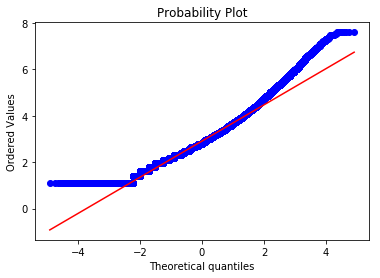

In [55]:
# This probability plot tests whether log-transformed prices are normally distributed.
# They seem to be heavy-tailed on the right, which is a pattern that mirrors pricing in financial markets (leptokurtosis)
# The heavy right tail is also visible in the histogram above
stats.probplot(np.log(train_df.price[train_df.price > 0]), dist = 'norm', plot = plt)

In [57]:
train_df.item_condition_id.value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

In [64]:
train_df.item_condition_id.cat.categories.values

array(['1', '2', '3', '4', '5'], dtype=object)

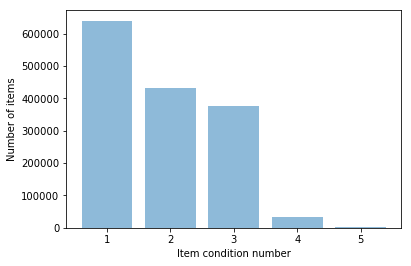

In [66]:
y_pos = np.arange(len(train_df.item_condition_id.value_counts()))
plt.bar(y_pos, train_df.item_condition_id.value_counts(), align='center', alpha=0.5)
plt.xticks(y_pos, train_df.item_condition_id.cat.categories.values)
plt.ylabel('Number of items')
plt.xlabel('Item condition number')